# Distribution of order parameter

In [1]:
import numpy as np, glob
import matplotlib.pylab as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/gk/bdqkskqj2fv8dk9kgrxm5psh0000gn/T/ipykernel_27734/1018117210.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### Overlap between distributions

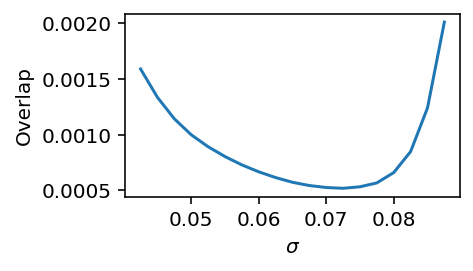

In [2]:
data=np.loadtxt('results.txt')

plt.figure(figsize=(3.4,2))
plt.plot(data[:,0],data[:,1])
plt.xlabel(r'$\sigma$')
plt.ylabel('Overlap')
plt.tight_layout()

In [3]:
sigma_min=data[data[:,1]==min(data[:,1])][0][0]
print('Minimum overlap for sigma = {}'.format(sigma_min))

Minimum overlap for sigma = 0.0725


### Distributions

In [4]:
hist_liquid = np.loadtxt('Liquid/histo')
hist_IceV = np.loadtxt('IceV/histo')


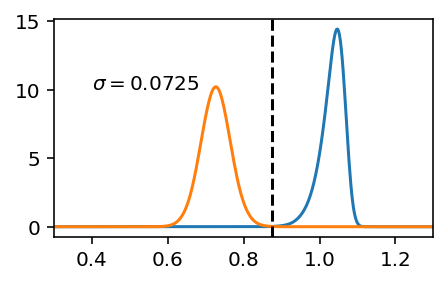

In [5]:
plt.figure(figsize=(3.4,2))
plt.plot(hist_IceV[:,0],hist_IceV[:,1])
plt.plot(hist_liquid[:,0],hist_liquid[:,1])
plt.xlim([0.3,1.3])
plt.annotate(r'$\sigma={}$'.format(sigma_min),(0.4,10))

diff_val = np.abs(hist_liquid[:,1]-hist_IceV[:,1])
diff_bin = hist_liquid[:,0]
diff_val = diff_val[(diff_bin>0.65) * (diff_bin<1.05)]
diff_bin = diff_bin[(diff_bin>0.65) * (diff_bin<1.05)]

min_order= diff_bin[diff_val.min()==diff_val]
plt.axvline(x=min_order, color='k', linestyle='--')

In [6]:
print('Liquid max:', hist_liquid[hist_liquid[:,1]==hist_liquid[:,1].max()][0][0])

Liquid max: 0.7275


In [7]:
print('IceV max:', hist_IceV[hist_IceV[:,1]==hist_IceV[:,1].max()][0][0])

IceV max: 1.0475


In [8]:
print('Midpoint between distribitions:', min_order[0])

Midpoint between distribitions: 0.875


## Effect of pressure on overlap

overlap_3500bar.dat 0.075
overlap_6000bar.dat 0.07
overlap_5000bar.dat 0.07
overlap_4000bar.dat 0.0725


(0.0, 0.002)

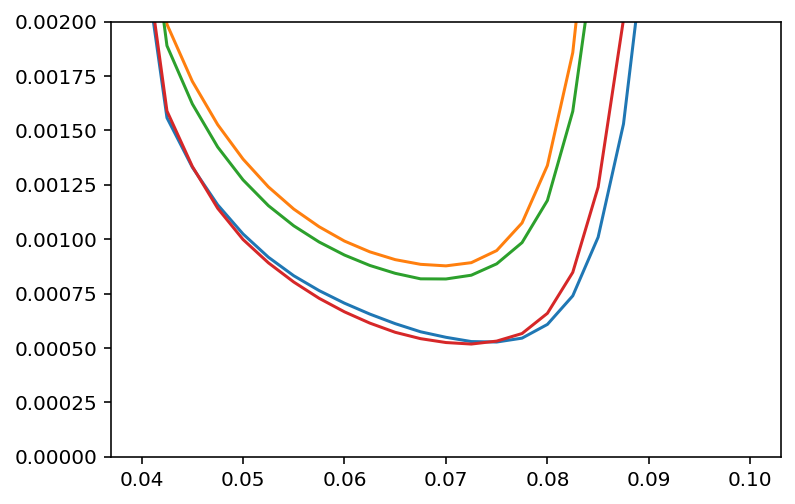

In [9]:
bars=set()
#overlaps=[]
for f in glob.glob('overlap*'):
    data=np.loadtxt(f)

    sigma_min=data[data[:,1]==min(data[:,1])][0][0]
    bars.add((f.split('/')[-1].replace('overlap_','').replace('.dat',''),sigma_min))
    print(f,sigma_min)
    #overlaps.append()
    plt.plot(data[:,0],data[:,1])
plt.ylim([0,0.002])

In [10]:
print(bars)
hist_liquid = np.loadtxt('Liquid/histo')
hist_IceV = np.loadtxt('IceV/histo')


{('6000bar', 0.07), ('4000bar', 0.0725), ('3500bar', 0.075), ('5000bar', 0.07)}


In [11]:
def remove_0(hist):
    return hist[hist[:,1]>0.001]

IceV_6000bar/Histo_0.0700
Liquid max: 0.69
IceV max: 1.015
Midpoint between distribitions: 0.5025
0.35624999999999996
0.6487499999999999
IceV_4000bar/Histo_0.0725
Liquid max: 0.6675
IceV max: 1.0125
Midpoint between distribitions: 0.825
0.66975
0.98025
IceV_3500bar/Histo_0.0750
Liquid max: 0.66
IceV max: 1.0125
Midpoint between distribitions: 0.82
0.661375
0.9786249999999999
IceV_5000bar/Histo_0.0700
Liquid max: 0.68
IceV max: 1.015
Midpoint between distribitions: 0.5025
0.35175
0.6532499999999999


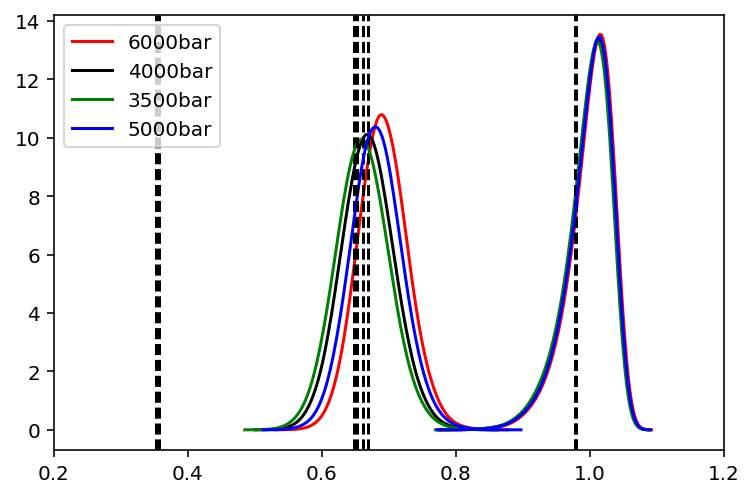

In [13]:
colors=['r','k','g','b']
for i, bar in enumerate(bars):
    #hist_liquid = np.loadtxt('Liquid_{}/Histo'.format(bar[0]))
    #hist_IceV = np.loadtxt('IceV_{}/Histo_{:.4}'.format(bar[0]))

    sig=0.07
    
    hist_IceV=np.loadtxt('IceV_{}/Histo_{:.4f}'.format(bar[0],sig))
    hist_Liquid=np.loadtxt('Liquid_{}/Histo_{:.4f}'.format(bar[0],sig))
    diff_val = np.abs(hist_Liquid[:,1]-hist_IceV[:,1])
    diff_bin = hist_liquid[:,0]
    diff_val = diff_val[(diff_bin>0.5) * (diff_bin<1.0)]
    diff_bin = diff_bin[(diff_bin>0.5) * (diff_bin<1.0)]

    hist_IceV=remove_0(hist_IceV)
    hist_Liquid=remove_0(hist_Liquid)
    max_ice=hist_IceV[hist_IceV[:,1]==hist_IceV[:,1].max()][0][0]
    max_liquid=hist_Liquid[hist_Liquid[:,1]==hist_Liquid[:,1].max()][0][0]
    dist=0.5*(max_ice-max_liquid)*0.9
    print('IceV_{}/Histo_{:.4f}'.format(bar[0],bar[1]))
    print('Liquid max:', hist_Liquid[hist_Liquid[:,1]==hist_Liquid[:,1].max()][0][0])
    print('IceV max:', hist_IceV[hist_IceV[:,1]==hist_IceV[:,1].max()][0][0])
   
    min_order= diff_bin[diff_val.min()==diff_val]
    print('Midpoint between distribitions:', min_order[0])
    plt.plot(hist_IceV[:,0],hist_IceV[:,1],color=colors[i],label=bar[0])
    plt.plot(hist_Liquid[:,0],hist_Liquid[:,1],color=colors[i])
    plt.axvline(x=min_order[0]+dist,ls='--',color='k')
    plt.axvline(x=min_order[0]-dist,ls='--',color='k')
    print(min_order[0]-dist)
    print(min_order[0]+dist)
plt.xlim([0.2,1.2])
plt.legend()


In [25]:
Final choice 0.55 and 0.80

SyntaxError: invalid syntax (368835356.py, line 1)